In [1]:
import collectionOsm as osm
import osmDownload as osmD


# Generate geometry

Generate geometry to be pass to the lib.

In [2]:
# import libraries
import requests
import geopandas as gpd
import pandas as pd
import shapely.wkb
from shapely.geometry import Polygon, MultiPolygon, LineString
import time

In [3]:
"""queryUrl = 'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541'
#queryParams = {'sql': "select the_geom, name_1 from gadm28_adm1 where iso='USA'"}
queryParams = {'sql': "select * from gadm28_adm1 where name_1='New York'"}
resp = requests.get(queryUrl, queryParams)
"""

'queryUrl = \'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541\'\n#queryParams = {\'sql\': "select the_geom, name_1 from gadm28_adm1 where iso=\'USA\'"}\nqueryParams = {\'sql\': "select * from gadm28_adm1 where name_1=\'New York\'"}\nresp = requests.get(queryUrl, queryParams)\n'

In [4]:
queryUrl = 'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541'
#queryParams = {'sql': "select the_geom, name_1 from gadm28_adm1 where iso='USA'"}
queryParams = {'sql': "select * from gadm28_adm1 where name_1='Galicia'"}
resp = requests.get(queryUrl, queryParams)
data = resp.json()['data']

In [5]:
for el in data:
    geometry =  shapely.wkb.loads(el['the_geom'], hex=True)
    name = el['name_1']
    el['geometry']=geometry

In [6]:
gdf = gpd.GeoDataFrame(data)
gdf.head()

,cartodb_id,the_geom,the_geom_webmercator,objectid,id_0,iso,name_0,id_1,name_1,hasc_1,...,varname_1,shape_leng,shape_area,bbox,centroid,area_ha,topojson,the_geom_simple,geojson,geometry
0,2859,0106000020E61000002A00000001030000000100000005...,0106000020110F00002A00000001030000000100000005...,2859,215,ESP,Spain,12,Galicia,ES.GA,...,Galice|Gal¡cia|Galicien|Galiza|Galizia,26.55111,3.255741,"{""type"":""Polygon"",""coordinates"":[[[-9.30125045...","{""type"":""Point"",""coordinates"":[-7.911230406478...",2.960560e+06,None,0106000020E6100000010000000103000000010000004E...,"{""type"":""MultiPolygon"",""coordinates"":[[[[-8.86...","MULTIPOLYGON (((-8.86292 42.14764, -8.86292 42..."


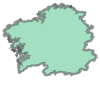

In [7]:
#WE'RE GOING TO WORK WITH THE GEOMETRY OF THE ESTATE OF NEW YORK 
geometry = gdf['geometry'][0]
geometry

In [8]:
osmC = osm.CollectionOsm(geometry=geometry, zoom=5, crs=None, geom_tiles=False)

/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exclude'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exported'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [9]:
manifest = osmC.get_manifest()
manifest.head()

/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exclude'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['exported'] = 0
/home/jovyan/work/test_dev/osmUtils/osmUtils/utils_geo.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,id,geometry,exclude,exported,uploaded
491,30.0,"POLYGON ((-9.18597 42.88486, -9.18208 42.88070...",0,0,0
491,27.0,"POLYGON ((-9.17042 42.80208, -9.16681 42.80014...",0,0,0
491,29.0,"POLYGON ((-9.16875 42.86847, -9.16681 42.86597...",0,0,0
491,25.0,"POLYGON ((-9.14542 42.74097, -9.14320 42.73875...",0,0,0
491,28.0,"POLYGON ((-9.14569 42.81875, -9.14320 42.81569...",0,0,0


In [12]:
osmretrieved = osmD.OsmDownload(
    geometry,
    osm_type='all_roads',
    infrastructure='way["highway"]',
    custom_filter=None,
    output_path=None,
)


Fetching OSM
Geometry coordines converted into string
42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918");>;);out;
Requesting data within polygon from API in 99 request(s)
Pausing 1 seconds before making API POST request
Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918");>;);out;'}"
42.149029 -8.855417 42.147083 -8.853471 4

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.349304 -8.933473 42.347363 -8.931805 42.345139 -8.931805 42.343472 -8.933473 42.343472 -8.935417 42.340973 -8.938195 42.345417 -8.939027 42.349304 -8.936805 42.349304 -8.933473");>;);out;'}"
42.402084 -8.920694 42.395973 -8.919860 42.393196 -8.920694 42.389584 -8.924860 42.389584 -8.925972 42.385693 -8.927082 42.384029 -8.928473 42.380974 -8.928473 42.375973 -8.930139 42.374584 -8.932917 42.373196 -8.932361 42.367085 -8.933473 42.359585 -8.936249 42.356529 -8.936249 42.355415 -8.937639 42.357361 -8.941249 42.354862 -8.943472 42.355972 -8.946250 42.358471 -8.945972 42.360416 -8.948194 42.361805 -8.947362 42.365417 -8.947916 42.367638 -8.949582 42.367363 -8.946806 42.369583 -8.944028 42.368195 -8.941249 42.369305 

42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806");>;);out;
Requesting data within polygon from API in 99 request(s)
Pausing 1 seconds before making API POST request
Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806");>;);out;'}"
42.494026 -9.004306 42.492638 -9.003750 42.491806 -9.006528 42.493195 -9.006806 42.494026 -9.004

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.544029 -8.899582 42.540974 -8.898750 42.540695 -8.900138 42.537083 -8.900973 42.539860 -8.903751 42.541248 -8.901807 42.543751 -8.901526 42.544029 -8.899582");>;);out;'}"
42.547359 -8.916806 42.545418 -8.912639 42.544029 -8.912083 42.543472 -8.914305 42.544582 -8.916806 42.547359 -8.916806
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.547359 -8.916806 42.545418 -8.912639 42.544029 -8.912083 42.543472 -8.914305 42.544582 -8.916806 42.547359 -8.916806");>;);out;
Requesting data within polygon from API in 119 request(s)
Pausing 1 seconds before making API POST req

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.622360 -8.779862 42.620693 -8.777917 42.618473 -8.777639 42.617638 -8.780140 42.614582 -8.783750 42.613750 -8.787638 42.616249 -8.790972 42.620419 -8.788750 42.620693 -8.783750 42.622360 -8.779862");>;);out;'}"
42.639305 -9.092639 42.638195 -9.090417 42.635693 -9.088751 42.635418 -9.091805 42.636528 -9.093751 42.639305 -9.092639
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.639305 -9.092639 42.638195 -9.090417 42.635693 -9.088751 42.635418 -9.091805 42.636528 -9.093751 42.639305 -9.092639");>;);out;
Requesting data within polygon from API in 119 request(s)
Paus

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.884861 -9.185972 42.880695 -9.182083 42.876804 -9.181527 42.875973 -9.184306 42.876804 -9.185972 42.880695 -9.189584 42.884583 -9.188194 42.884861 -9.185972");>;);out;'}"
43.363472 -8.839028 43.361526 -8.836250 43.362362 -8.834306 43.361252 -8.832361 43.357918 -8.830973 43.357082 -8.832639 43.354584 -8.831249 43.352638 -8.832361 43.353748 -8.835418 43.357639 -8.835694 43.357918 -8.838194 43.356251 -8.839860 43.354862 -8.845138 43.356804 -8.847363 43.358471 -8.846807 43.359859 -8.849029 43.361252 -8.848473 43.361252 -8.845416 43.363472 -8.839028
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.719028 -7.438194 43.717361 -7.438472 43.715973 -7.441250 43.717083 -7.442084 43.719028 -7.438194");>;);out;'}"
43.761806 -7.629306 43.758194 -7.627916 43.756527 -7.629306 43.756248 -7.632916 43.757915 -7.634306 43.760139 -7.634028 43.761528 -7.632084 43.761806 -7.629306
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.761806 -7.629306 43.758194 -7.627916 43.756527 -7.629306 43.756248 -7.632916 43.757915 -7.634306 43.760139 -7.634028 43.761528 -7.632084 43.761806 -7.629306");>;);out;
Requesting data within polygon from API in 159 request(s)
Pausing 1 seconds before

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.474583 -7.052639 43.472401 -7.055816 43.474010 -7.061735 43.470062 -7.069197 43.465801 -7.071481 43.464943 -7.077901 43.461643 -7.080125 43.453907 -7.090172 43.447803 -7.089659 43.444458 -7.085269 43.443268 -7.086056 43.445274 -7.089155 43.441730 -7.097775 43.439903 -7.099147 43.432858 -7.096966 43.433571 -7.102648 43.432537 -7.104690 43.429482 -7.100405 43.426987 -7.102732 43.428951 -7.108473 43.425255 -7.112560 43.426243 -7.117606 43.423706 -7.129314 43.425198 -7.129738 43.430744 -7.141876 43.428741 -7.152030 43.431961 -7.161848 43.430370 -7.172832 43.424606 -7.174598 43.422115 -7.169634 43.414600 -7.176651 43.408966 -7.171236 43.408817 -7.168893 43.403549 -7.168394 43.403034 -7.169976 43.405350 -7.174420 43.4

No data for retrieved!


In [12]:
osm_filter = osmD.generate_filter(osm_type='all_roads')

In [14]:
response_json = osmD.retrieve_osm(
    geometry,
    osm_filter=osm_filter,
    infrastructure='way["highway"]',
    timeout=180,
    overpass_endpoint='http://overpass-api.de/api',
)


Fetching OSM
Geometry coordines converted into string
42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918");>;);out;
Requesting data within polygon from API in 99 request(s)
Pausing 1 seconds before making API POST request
Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.147640 -8.862918 42.144859 -8.862918 42.144859 -8.866250 42.146526 -8.866528 42.147640 -8.862918");>;);out;'}"
42.149029 -8.855417 42.147083 -8.853471 4

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.349304 -8.933473 42.347363 -8.931805 42.345139 -8.931805 42.343472 -8.933473 42.343472 -8.935417 42.340973 -8.938195 42.345417 -8.939027 42.349304 -8.936805 42.349304 -8.933473");>;);out;'}"
42.402084 -8.920694 42.395973 -8.919860 42.393196 -8.920694 42.389584 -8.924860 42.389584 -8.925972 42.385693 -8.927082 42.384029 -8.928473 42.380974 -8.928473 42.375973 -8.930139 42.374584 -8.932917 42.373196 -8.932361 42.367085 -8.933473 42.359585 -8.936249 42.356529 -8.936249 42.355415 -8.937639 42.357361 -8.941249 42.354862 -8.943472 42.355972 -8.946250 42.358471 -8.945972 42.360416 -8.948194 42.361805 -8.947362 42.365417 -8.947916 42.367638 -8.949582 42.367363 -8.946806 42.369583 -8.944028 42.368195 -8.941249 42.369305 

42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806");>;);out;
Requesting data within polygon from API in 99 request(s)
Pausing 1 seconds before making API POST request
Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.492638 -9.001806 42.489582 -9.001806 42.489861 -9.003472 42.492085 -9.003472 42.492638 -9.001806");>;);out;'}"
42.494026 -9.004306 42.492638 -9.003750 42.491806 -9.006528 42.493195 -9.006806 42.494026 -9.004

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.544029 -8.899582 42.540974 -8.898750 42.540695 -8.900138 42.537083 -8.900973 42.539860 -8.903751 42.541248 -8.901807 42.543751 -8.901526 42.544029 -8.899582");>;);out;'}"
42.547359 -8.916806 42.545418 -8.912639 42.544029 -8.912083 42.543472 -8.914305 42.544582 -8.916806 42.547359 -8.916806
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.547359 -8.916806 42.545418 -8.912639 42.544029 -8.912083 42.543472 -8.914305 42.544582 -8.916806 42.547359 -8.916806");>;);out;
Requesting data within polygon from API in 119 request(s)
Pausing 1 seconds before making API POST req

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.622360 -8.779862 42.620693 -8.777917 42.618473 -8.777639 42.617638 -8.780140 42.614582 -8.783750 42.613750 -8.787638 42.616249 -8.790972 42.620419 -8.788750 42.620693 -8.783750 42.622360 -8.779862");>;);out;'}"
42.639305 -9.092639 42.638195 -9.090417 42.635693 -9.088751 42.635418 -9.091805 42.636528 -9.093751 42.639305 -9.092639
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.639305 -9.092639 42.638195 -9.090417 42.635693 -9.088751 42.635418 -9.091805 42.636528 -9.093751 42.639305 -9.092639");>;);out;
Requesting data within polygon from API in 119 request(s)
Paus

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"42.884861 -9.185972 42.880695 -9.182083 42.876804 -9.181527 42.875973 -9.184306 42.876804 -9.185972 42.880695 -9.189584 42.884583 -9.188194 42.884861 -9.185972");>;);out;'}"
43.363472 -8.839028 43.361526 -8.836250 43.362362 -8.834306 43.361252 -8.832361 43.357918 -8.830973 43.357082 -8.832639 43.354584 -8.831249 43.352638 -8.832361 43.353748 -8.835418 43.357639 -8.835694 43.357918 -8.838194 43.356251 -8.839860 43.354862 -8.845138 43.356804 -8.847363 43.358471 -8.846807 43.359859 -8.849029 43.361252 -8.848473 43.361252 -8.845416 43.363472 -8.839028
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.719028 -7.438194 43.717361 -7.438472 43.715973 -7.441250 43.717083 -7.442084 43.719028 -7.438194");>;);out;'}"
43.761806 -7.629306 43.758194 -7.627916 43.756527 -7.629306 43.756248 -7.632916 43.757915 -7.634306 43.760139 -7.634028 43.761528 -7.632084 43.761806 -7.629306
[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.761806 -7.629306 43.758194 -7.627916 43.756527 -7.629306 43.756248 -7.632916 43.757915 -7.634306 43.760139 -7.634028 43.761528 -7.632084 43.761806 -7.629306");>;);out;
Requesting data within polygon from API in 159 request(s)
Pausing 1 seconds before

Posting to http://overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"][!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|elevator|escalator|proposed|bridleway|abandoned|platform"](poly:"43.474583 -7.052639 43.472401 -7.055816 43.474010 -7.061735 43.470062 -7.069197 43.465801 -7.071481 43.464943 -7.077901 43.461643 -7.080125 43.453907 -7.090172 43.447803 -7.089659 43.444458 -7.085269 43.443268 -7.086056 43.445274 -7.089155 43.441730 -7.097775 43.439903 -7.099147 43.432858 -7.096966 43.433571 -7.102648 43.432537 -7.104690 43.429482 -7.100405 43.426987 -7.102732 43.428951 -7.108473 43.425255 -7.112560 43.426243 -7.117606 43.423706 -7.129314 43.425198 -7.129738 43.430744 -7.141876 43.428741 -7.152030 43.431961 -7.161848 43.430370 -7.172832 43.424606 -7.174598 43.422115 -7.169634 43.414600 -7.176651 43.408966 -7.171236 43.408817 -7.168893 43.403549 -7.168394 43.403034 -7.169976 43.405350 -7.174420 43.4

No data retrieved!


In [15]:
response_json

[{'version': 0.6,
  'generator': 'Overpass API 0.7.56.7 b85c4387',
  'osm3s': {'timestamp_osm_base': '2020-12-17T16:55:03Z',
   'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
  'elements': []},
 {'version': 0.6,
  'generator': 'Overpass API 0.7.56.7 b85c4387',
  'osm3s': {'timestamp_osm_base': '2020-12-17T16:55:03Z',
   'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
  'elements': []},
 {'version': 0.6,
  'generator': 'Overpass API 0.7.56.8 7d656e78',
  'osm3s': {'timestamp_osm_base': '2020-12-17T16:55:03Z',
   'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
  'elements': []},
 {'version': 0.6,
  'generator': 'Overpass API 0.7.56.8 7d656e78',
  'osm3s': {'timestamp_osm_base': '2020-12-17T16:55:03Z',
   'copyright': 'The data included in this document is from www.open

In [17]:
gdf = osmD.generate_osm_gdf(response_json)
gdf.head()

,geometry
0,"LINESTRING (-8.92914 42.37716, -8.93032 42.377..."
1,"LINESTRING (-8.93195 42.37675, -8.93211 42.376..."
2,"LINESTRING (-8.93568 42.38204, -8.93569 42.382..."
3,"LINESTRING (-8.93473 42.37412, -8.93479 42.37410)"
4,"LINESTRING (-8.93479 42.37410, -8.93493 42.374..."


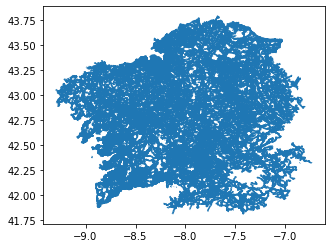

In [18]:
gdf.plot()

In [19]:
def generate_filter(osm_type):
    """
    Create a filter to retrieve osm data
    
    Parameters
    ----------
    osm_type: string
        {'all_roads'}
    Returns
    -------
    osm_filter: string
        filter to be used in the overpass API query
    """
    filters = dict()
    filters['all_roads'] = (
        '[!"tunnel"]["area"!="yes"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|corridor|' \
        'elevator|escalator|proposed|bridleway|abandoned|platform"]'
    )
    filters['none'] = ''
    
    #todo: add more filters
    if osm_type in filters:
        osm_filter = filters[osm_type]
    else:
        raise ValueError(f'Unrecognised filter type: {osm_type}')
    return osm_filter

In [20]:
generate_filter(osm_type='none')

''